In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.rcParams.update({"font.size": 11})
plt.rcParams.update({"axes.titlesize": 12})
plt.rcParams["font.family"] = "serif"
uparrow=f"\u2191"
downarrow=f"\u2193"

In [2]:
imgnet = "imagenet"
imgnetv2 = "imagenet_ood"
caltech256 = "caltech256"
iwc_ind = "iwildcam"
iwc_ood = "iwildcam_ood"
prefix_single_model = "eval_res/evaluation_single_model" # evaluation_single_model

datasets_names = ["ImageNet","ImageNet V2", "iWildCam", "iWildCam OOD","Caltech 256",]
datasets = [imgnet,imgnetv2,iwc_ind,iwc_ood,caltech256]

architecture_family = {
    "vit": "ViT",
    "convnext": "ConvNeXt",
    "efficient": "EfficientNet",
    "mnas": "MNASNet",
    "regnet": "RegNet",
    "resnet": "ResNet",
    "regnext": "RegNeXt",
    "resnext": "ResNeXt",
    "shuffle": "ShuffleNet",
    "swin": "Swin"
}

def get_architecture(model_name):
    for key, value in architecture_family.items():
        if key in model_name.lower():
            return value
    return "Other"

num_dataset = len(datasets)
single_model_dfs = [pd.read_csv(f"{prefix_single_model}_{dataset}.csv") for dataset in datasets]
for i,df in enumerate(single_model_dfs):
    df["architecture"] = df["model"].apply(get_architecture)
    df=df[df["uncertainty_type"]=="softmax_response"]
    single_model_dfs[i]=df


In [3]:
display(single_model_dfs[1].head())
backbone_df = pd.read_csv("backbones.csv")
backbone_df = backbone_df.rename(columns={"model_name": "model"})
single_model_dfs = [
    df.merge(backbone_df, on="model", how="left")
    for df in single_model_dfs
]
display(single_model_dfs[1].head())

,Acc,F1,Brier,NLL,ECE,CP_AUROC,AURC,E-AURC,SAC@90,SAC@91,...,SAC@97,SAC@98,SAC@99,model,wrapper,uncertainty_type,gflops,params,split,architecture
0,0.7359,0.733140,0.000407,1.350982,0.138764,0.797572,0.124283,0.085842,0.5501,0.4759,...,0.0010,0.0010,0.0010,ConvNeXt_Base,NaN,softmax_response,15.36,88.6,ood_test,ConvNeXt
2,0.7359,0.733140,0.000393,1.229133,0.098192,0.825663,0.107192,0.068751,0.6282,0.5967,...,0.0012,0.0012,0.0012,ConvNeXt_Base,TempScaleWrapper,softmax_response,15.36,88.6,ood_test,ConvNeXt
4,0.7435,0.740608,0.000381,1.263544,0.082072,0.804685,0.116089,0.079939,0.6003,0.5198,...,0.0041,0.0025,0.0025,ConvNeXt_Large,NaN,softmax_response,34.36,197.8,ood_test,ConvNeXt
6,0.7435,0.740608,0.000381,1.201289,0.092417,0.825850,0.103942,0.067792,0.6409,0.6065,...,0.0041,0.0032,0.0032,ConvNeXt_Large,TempScaleWrapper,softmax_response,34.36,197.8,ood_test,ConvNeXt
8,0.7317,0.729124,0.000412,1.362010,0.129095,0.794755,0.126129,0.086387,0.5351,0.4134,...,0.0002,0.0002,0.0002,ConvNeXt_Small,NaN,softmax_response,8.68,50.2,ood_test,ConvNeXt


,Acc,F1,Brier,NLL,ECE,CP_AUROC,AURC,E-AURC,SAC@90,SAC@91,...,architecture_family,source,tv_weights,Acc@1,Acc@5,Params,GFLOPS,Architecture,Year,Version
0,0.7359,0.733140,0.000407,1.350982,0.138764,0.797572,0.124283,0.085842,0.5501,0.4759,...,ConvNeXt,torchvision,IMAGENET1K_V1,84.062,96.870,88.6,15.36,ConvNeXt_Base,2022.0,V1
1,0.7359,0.733140,0.000393,1.229133,0.098192,0.825663,0.107192,0.068751,0.6282,0.5967,...,ConvNeXt,torchvision,IMAGENET1K_V1,84.062,96.870,88.6,15.36,ConvNeXt_Base,2022.0,V1
2,0.7435,0.740608,0.000381,1.263544,0.082072,0.804685,0.116089,0.079939,0.6003,0.5198,...,ConvNeXt,torchvision,IMAGENET1K_V1,84.414,96.976,197.8,34.36,ConvNeXt_Large,2022.0,V1
3,0.7435,0.740608,0.000381,1.201289,0.092417,0.825850,0.103942,0.067792,0.6409,0.6065,...,ConvNeXt,torchvision,IMAGENET1K_V1,84.414,96.976,197.8,34.36,ConvNeXt_Large,2022.0,V1
4,0.7317,0.729124,0.000412,1.362010,0.129095,0.794755,0.126129,0.086387,0.5351,0.4134,...,ConvNeXt,torchvision,IMAGENET1K_V1,83.616,96.650,50.2,8.68,ConvNeXt_Small,2022.0,V1


In [4]:
prefix_duo="eval_res/evaluation_duo"
duo_dfs = [pd.read_csv(f"{prefix_duo}_{dataset}.csv") for dataset in datasets]
display(duo_dfs[0].head())
print(duo_dfs[0].columns)
print(duo_dfs[0]["mode"].unique())
mode_map = {
    "softvote": "Logit Average",
    "dictatorial": "Dictatorial",
    "confident": "Confident",
    "weighted_voting": "Temperature-Weighted",
    "Single Model":"Single Large Model"
}
mode_map_new = {
    "logit_average": "Logit Average",
    "dictatorial_weighteduncertainty": "Dictatorial",
    "temperature_weighted": "Temperature-Weighted"
}
for i,df in enumerate(duo_dfs):
    if "uncertainty_type" in df.columns:
        df = df[df["uncertainty_type"]=="softmax_response"]
        df = df[df["mode"].isin(["logit_average","dictatorial_weighteduncertainty","temperature_weighted"])]
        df["mode"] = df["mode"].replace(mode_map_new)
    else:
        df["mode"] = df["mode"].replace(mode_map)
    duo_dfs[i]=df

mode_order = ["Single Large Model","Logit Average","Dictatorial","Temperature-Weighted","Confident"]

,Acc,F1,Brier,NLL,ECE,CP_AUROC,AURC,E-AURC,SAC@90,SAC@91,...,SAC@99,model_large,model_small,mode,wrapper,uncertainty_type,gflops_large,gflops_small,gflops_balance,split
0,0.811705,0.809561,0.000267,0.733626,0.015683,0.872051,0.050384,0.031424,0.821958,0.796105,...,0.005116,ResNet50,EfficientNet_B0,logit_average,DuoWrapper,softmax_response,4.09,0.39,0.09535,test
1,0.811705,0.809561,0.000267,0.733626,0.015683,0.855315,0.054667,0.035707,0.798379,0.769853,...,0.004611,ResNet50,EfficientNet_B0,logit_average,DuoWrapper,entropy,4.09,0.39,0.09535,test
2,0.808632,0.806404,0.000266,0.724725,0.028336,0.878710,0.050065,0.030458,0.824337,0.800737,...,0.011474,ResNet50,EfficientNet_B0,dictatorial_weighteduncertainty,DuoWrapper,softmax_response,4.09,0.39,0.09535,test
3,0.808632,0.806404,0.000266,0.724725,0.028336,0.863718,0.053951,0.034343,0.805789,0.779053,...,0.007095,ResNet50,EfficientNet_B0,dictatorial_weighteduncertainty,DuoWrapper,entropy,4.09,0.39,0.09535,test
4,0.815895,0.813772,0.000266,0.724725,0.028336,0.867715,0.049795,0.031698,0.824337,0.800737,...,0.011474,ResNet50,EfficientNet_B0,temperature_weighted,DuoWrapper,softmax_response,4.09,0.39,0.09535,test


Index(['Acc', 'F1', 'Brier', 'NLL', 'ECE', 'CP_AUROC', 'AURC', 'E-AURC',
       'SAC@90', 'SAC@91', 'SAC@92', 'SAC@93', 'SAC@94', 'SAC@95', 'SAC@96',
       'SAC@97', 'SAC@98', 'SAC@99', 'model_large', 'model_small', 'mode',
       'wrapper', 'uncertainty_type', 'gflops_large', 'gflops_small',
       'gflops_balance', 'split'],
      dtype='object')
['logit_average' 'dictatorial_weighteduncertainty' 'temperature_weighted']


In [5]:
metrics = ['Acc', 'F1', 'Brier', 'NLL', 'CP_AUROC', 'AURC','ECE',"SAC@98"]# + [f"SAC@{i}" for i in range(90, 100)]
merged_dfs = []

for duo_df, single_df, dataset_name in zip(duo_dfs, single_model_dfs, datasets_names):
    single_df = single_df.add_suffix("_baseline")
    merged = pd.merge(
        duo_df,
        single_df,
        left_on=["model_large", "uncertainty_type"],
        right_on=["model_baseline", "uncertainty_type_baseline"],
        how="left"
    )

    # Step 3: Compute delta and percentage improvement
    for metric in metrics:
        baseline_col = f"{metric}_baseline"
        delta_col = f"delta_{metric}"
        improvement_col = f"improvement_{metric}"

        merged[delta_col] = merged[metric] - merged[baseline_col]

        if metric in ["Acc", "F1", "CP_AUROC","SAC@98"]:
            merged[improvement_col] = merged[delta_col] / (1-merged[baseline_col]) * 100
        elif metric in ["Brier", "NLL", "AURC", "ECE"]:
            merged[improvement_col] = -merged[delta_col] / merged[baseline_col] * 100
        else:
            merged[improvement_col] = merged[delta_col] / merged[baseline_col] * 100

    # Add dataset column
    merged["dataset"] = dataset_name
    merged_dfs.append(merged)

# Concatenate and keep only relevant columns
final_df = pd.concat(merged_dfs, ignore_index=True)

base_cols = [
    "model_large", "model_small", "mode", "wrapper", "uncertainty_type",
    "gflops_large", "gflops_small", "gflops_balance", "split", "dataset"
]
improvement_cols = [f"improvement_{m}" for m in metrics]

final_df = final_df[base_cols + improvement_cols]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

metrics_to_spider = [
    "improvement_Brier",
    "improvement_AURC", 
    "improvement_CP_AUROC",
    "improvement_Acc", 
    "improvement_NLL", 
    "improvement_F1", 
     
]

metric_display_names = ["Brier",
                        "AURC",
                        "AUROC",
                        "Acc",
                        "NLL",
                        "F1",
                        ]

base_datasets= ['ImageNet', 'iWildCam', 'Caltech 256']
def plot_radar_grid_by_dataset(final_df, gflops_min, gflops_max,
                                mode="Temperature-Weighted", save_path=None):
    labels = [m.replace("improvement_", "") for m in metrics_to_spider]
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]

    # Filter
    df = final_df[
        (final_df["gflops_balance"] >= gflops_min) &
        (final_df["gflops_balance"] <= gflops_max) &
        (final_df["mode"] == mode)
    ].copy()

    if df.empty:
        print("No data found for given gflops range and mode.")
        return

    # Match base and ood pairs
    n = len(base_datasets)
    ncols = 3
    nrows = (n + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows, ncols, figsize=(3 * ncols, 3 * nrows), subplot_kw=dict(polar=True))
    plt.subplots_adjust(wspace=0.25)
    axes = axes.flatten()

    pastel = sns.color_palette("Set2", 3)
    duo_color, ood_color, baseline_color = pastel[0], pastel[1], pastel[2]

    for idx, base in enumerate(base_datasets):
        ax = axes[idx]
        for suffix, color, label, linestyle in [("", duo_color, "Duos (ours): IND","solid"), ("_ood", ood_color, "Duos (ours): OOD","solid")]:
            name = base + suffix
            if name not in df["dataset"].values:
                continue
            subdf = df[df["dataset"] == name]
            print(f"{subdf.shape[0]} duos found for {name}")
            mean_vals = subdf[metrics_to_spider].mean().values
            std_vals = subdf[metrics_to_spider].std().values

            values = np.append(mean_vals, mean_vals[0])
            errors = np.append(std_vals, std_vals[0])

            ax.plot(angles, values, label=label, color=color, linewidth=2.5, linestyle=linestyle)
            ax.fill_between(angles, values - errors, values + errors, color=color, alpha=0.2)

        # Plot baseline (flat 0 polygon)
        zero_line = np.zeros(len(labels) + 1)
        ax.plot(angles, zero_line, label="Baseline", linestyle="solid", color="maroon", linewidth=2.5)

        ax.set_xticks(angles[:-1])
        ax.set_xticklabels([])
        r_max = ax.get_ylim()[1]
        label_r = r_max

        for angle, label in zip(angles[:-1], metric_display_names):
            ax.text(angle+0.08, label_r+len(label)/2+5.5, label, fontsize=11, ha='center', va='center')

        yticks = (np.arange(4) - 1) * 10
        ax.set_yticks(yticks)
        ax.set_yticklabels([])
        for y in yticks:
            if y >= 0:
                ax.text(np.pi/2, y+1, f"{y}%", fontsize=11, ha="center", va="center")

        ax.text(0.5, -0.15, f"{base}", transform=ax.transAxes, ha="center", va="center", fontsize=13)
        ax.grid(True)
        ax.legend(loc="upper right", fontsize=10)


    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", ncol=3, fontsize=13, frameon=False, bbox_to_anchor=(0.5, 1.05),)
    
    # Hide unused subplots
    for j in range(0, idx+1):
        axes[j].get_legend().remove()

    if save_path:
        plt.savefig(save_path, bbox_inches="tight")
    plt.show()


In [12]:
def plot_radar_grid_by_dataset_match_y(final_df, gflops_min, gflops_max,
                                mode="Temperature-Weighted", save_path=None):
    labels = [m.replace("improvement_", "") for m in metrics_to_spider]
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]

    # Filter
    df = final_df[
        (final_df["gflops_balance"] >= gflops_min) &
        (final_df["gflops_balance"] <= gflops_max) &
        (final_df["mode"] == mode)
    ].copy()

    if df.empty:
        print("No data found for given gflops range and mode.")
        return

    # Match base and ood pairs
    n = len(base_datasets)
    ncols = 3
    nrows = (n + ncols - 1) // ncols

    # Make figure wider and increase spacing
    fig, axes = plt.subplots(nrows, ncols, figsize=(4 * ncols, 3 * nrows), subplot_kw=dict(polar=True))
    plt.subplots_adjust(wspace=0.5)
    axes = axes.flatten()

    pastel = sns.color_palette("Set2", 3)
    duo_color, ood_color, baseline_color = pastel[0], pastel[1], pastel[2]

    # First pass: collect the ylim from the first subplot
    first_ylim = None

    for idx, base in enumerate(base_datasets):
        ax = axes[idx]
        for suffix, color, label, linestyle in [("", duo_color, "Duos (ours): IND","solid"), ("_ood", ood_color, "Duos (ours): OOD","solid")]:
            name = base + suffix
            if name not in df["dataset"].values:
                continue
            subdf = df[df["dataset"] == name]
            print(f"{subdf.shape[0]} duos found for {name}")
            mean_vals = subdf[metrics_to_spider].mean().values
            std_vals = subdf[metrics_to_spider].std().values

            values = np.append(mean_vals, mean_vals[0])
            errors = np.append(std_vals, std_vals[0])

            ax.plot(angles, values, label=label, color=color, linewidth=2.5, linestyle=linestyle)
            ax.fill_between(angles, values - errors, values + errors, color=color, alpha=0.2)

        # Plot baseline (flat 0 polygon)
        zero_line = np.zeros(len(labels) + 1)
        ax.plot(angles, zero_line, label="Baseline", linestyle="solid", color="maroon", linewidth=2.5)

        # Store ylim from first subplot
        if idx == 0:
            first_ylim = ax.get_ylim()
        else:
            # Apply first subplot's ylim to all subsequent subplots
            ax.set_ylim(first_ylim)

        ax.set_xticks(angles[:-1])
        ax.set_xticklabels([])
        r_max = ax.get_ylim()[1]
        label_r = r_max

        for angle, label in zip(angles[:-1], metric_display_names):
            ax.text(angle+0.08, label_r+len(label)/2+5.5, label, fontsize=11, ha='center', va='center')

        yticks = (np.arange(4) - 1) * 10
        ax.set_yticks(yticks)
        ax.set_yticklabels([])
        for y in yticks:
            if y >= 0:
                ax.text(np.pi/2, y+1, f"{y}%", fontsize=11, ha="center", va="center")

        ax.text(0.5, -0.15, f"{base}", transform=ax.transAxes, ha="center", va="center", fontsize=13)
        ax.grid(True)
        ax.legend(loc="upper right", fontsize=10)


    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", ncol=3, fontsize=13, frameon=False, bbox_to_anchor=(0.5, 1.1),)
    
    # Hide unused subplots
    for j in range(0, idx+1):
        axes[j].get_legend().remove()

    if save_path:
        plt.savefig(save_path, bbox_inches="tight")
    plt.show()

22 duos found for ImageNet
22 duos found for ImageNet_ood
24 duos found for iWildCam
24 duos found for iWildCam_ood
30 duos found for Caltech 256


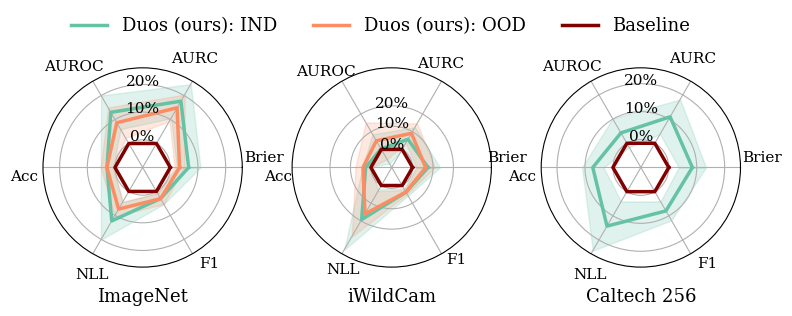

In [8]:
ood_map = {
    "ImageNet V2": "ImageNet_ood",
    "iWildCam OOD": "iWildCam_ood"
}
df_plot = final_df.copy()
df_plot["dataset"] = final_df["dataset"].replace(ood_map)
# df_plot=df_plot[df_plot["model_large"]!="tf_efficientnetv2_l.in21k_ft_in1k"]
df_plot=df_plot[df_plot["model_large"]!="ResNet50"]
plot_radar_grid_by_dataset(df_plot, gflops_min=0.1, gflops_max=0.2,save_path="pdf/spider_20.pdf")

22 duos found for ImageNet
22 duos found for ImageNet_ood
24 duos found for iWildCam
24 duos found for iWildCam_ood
30 duos found for Caltech 256


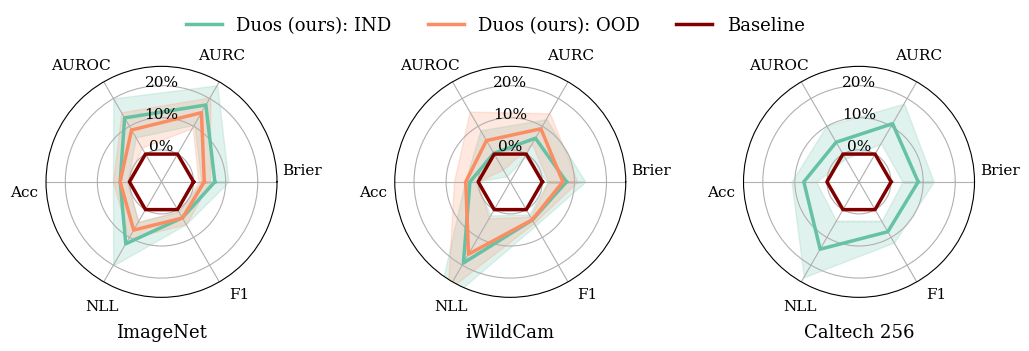

In [13]:
plot_radar_grid_by_dataset_match_y(df_plot, gflops_min=0.1, gflops_max=0.2, save_path="pdf/spider_20_matched.pdf")